# Matplotlib Tutorial



Sepideh Alassi, University of Basel  
Susanne Greiner, Wuerth-Phoenix S.r.l.



## Part II - Images, Contours & More

In order to see the resulting plots, matplotlib should be inlined in the first cell of IPython.

In [93]:
%matplotlib inline

 For handling images in addition to **import matplotlib** and **matplotlib.pyplot** we are going to need **matplotlib.image**

In [94]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np


### Importing image data into Numpy arrays

Loading image data is supported by the Pillow library. Natively, matplotlib only supports PNG images. The commands shown below fall back on Pillow if the native read fails.

The image used in this example is a PNG file, but keep that Pillow requirement in mind for your own data.

Here are the images we are going to play with:

In [95]:
img1 = mpimg.imread('BKW_Erlangen.png')
img2 = mpimg.imread('ESP_2016.png')

print(img1.shape, img2.shape)

(520, 801, 3) (520, 801, 4)


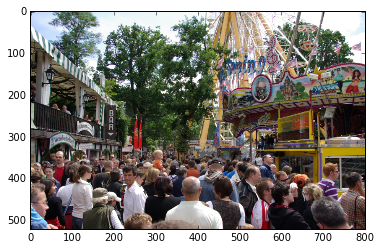

In [96]:
imgplot1 = plt.imshow(img1)

In [97]:
img1[0,0:10]

array([[ 0.73725492,  0.80392158,  0.98431373],
       [ 0.74117649,  0.80784315,  0.98823529],
       [ 0.74117649,  0.81568629,  0.98431373],
       [ 0.74117649,  0.81568629,  0.98431373],
       [ 0.74117649,  0.81176472,  0.98823529],
       [ 0.73725492,  0.80784315,  0.98431373],
       [ 0.74509805,  0.81176472,  0.98039216],
       [ 0.74509805,  0.81176472,  0.98431373],
       [ 0.74509805,  0.81176472,  0.98431373],
       [ 0.74117649,  0.81568629,  0.98431373]], dtype=float32)

It’s a 24-bit RGB PNG image (8 bits for each of R, G, B).

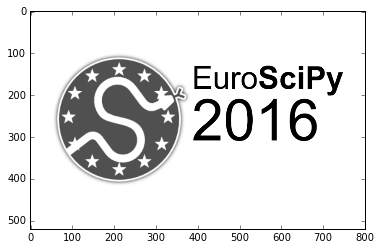

In [98]:
imgplot2 = plt.imshow(img2)

In [99]:
img2[0,0:10]

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]], dtype=float32)

It’s a 32-bit RGBA PNG image (8 bits for each of R, G, B, A). The 4th channel is transparency (alpha), or single-channel grayscale (luminosity).

Note the **dtype** - float32. Matplotlib has rescaled the 8 bit data from each channel to floating point data between 0.0 and 1.0.

Each inner list represents a pixel. Here, with an RGB image, there are 3 values. Since it’s a black and white image, R, G, and B are all similar. An RGBA (where A is alpha, or transparency), has 4 values per inner list, and a simple luminance image just has one value (and is thus only a 2-D array, not a 3-D array). For RGB and RGBA images, matplotlib supports float32 and uint8 data types. For grayscale, matplotlib supports only float32. If your array data does not meet one of these descriptions, you need to rescale it.

### Manipulating image numpy arrays¶

The plot object produced by **imshow** gives you an easy way to manipulate the plot from the prompt. Note: you can also plot any numpy array.

#### Applying pseudocolor schemes to image plots¶

Pseudocolor can be a useful tool for enhancing contrast and visualizing your data more easily. This is especially useful when making presentations of your data using projectors - their contrast is typically quite poor.

Pseudocolor is only relevant to single-channel, grayscale, luminosity images. We currently have an RGB image. Since R, G, and B are all similar (see for yourself above or in your data), we can just pick one channel of our data:

In [100]:
lum_img2 = img2[:,:,0]

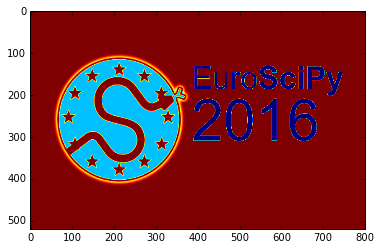

In [101]:
plt.imshow(lum_img2)

Now, with a luminosity (2D, no color) image, the default colormap (aka lookup table, LUT), is applied. The default is called jet. There are plenty of others to choose from. Soon in matplotlib 2.0 the default colormap is going to change. For infos try TODO

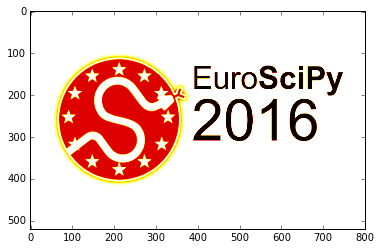

In [102]:
plt.imshow(lum_img2, cmap="hot")

#### Exercise: cut a few blank pixels at the border of the image

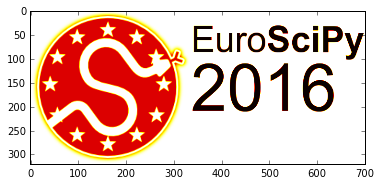

In [108]:
plt.imshow(lum_img2[100:-100,50:-50], cmap="hot")

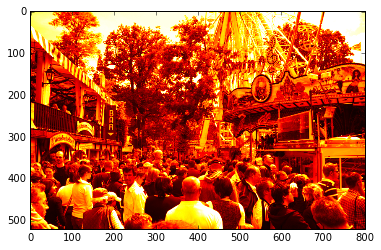

In [109]:
lum_img1 = img1[:,:,1]
plt.imshow(lum_img1, cmap="hot")

Note that you can also change colormaps on existing plot objects using the set_cmap() method:

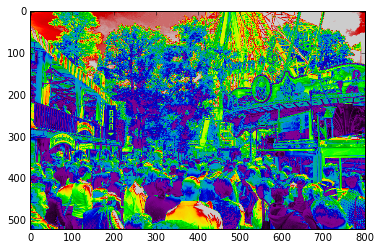

In [110]:
imgplot1 = plt.imshow(lum_img1)
imgplot1.set_cmap('spectral')

#### Color scale reference

It’s helpful to have an idea of what value a color represents. We can do that by adding color bars.

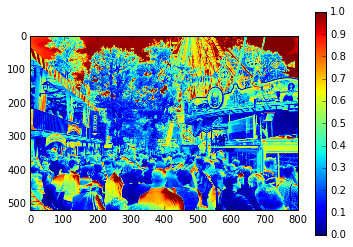

In [111]:
imgplot1 = plt.imshow(lum_img1)
plt.colorbar()

#### Examining a specific data range¶

Sometimes you want to enhance the contrast in your image, or expand the contrast in a particular region while sacrificing the detail in colors that don’t vary much, or don’t matter. A good tool to find interesting regions is the histogram. To create a histogram of our image data, we use the **hist()** function.

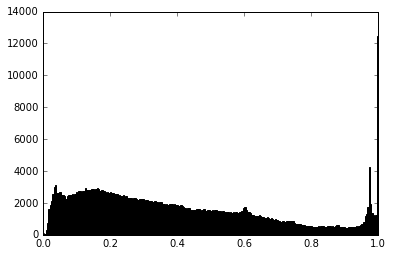

In [112]:
hist1 = plt.hist(lum_img1.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')

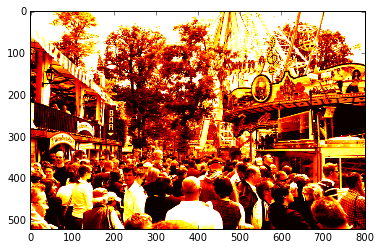

In [113]:
imgplot1 = plt.imshow(lum_img1, cmap='hot', clim=(0.1, 0.7))

#### Exercise: Use **hist** and **clim** to make the euroscipy  symbol (lum_img2) disappear

#### Combining Images

Arrays can be summed or combined in any other mathematical way and the result plotted again. This might be used for example for watermarks.

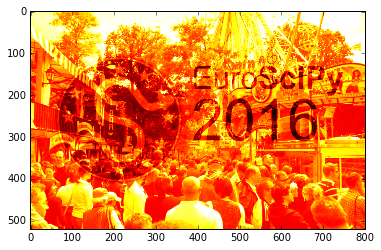

In [114]:
lum_img_comb = (lum_img1 + 0.5*lum_img2)/1.5
plt.imshow(lum_img_comb, cmap='hot')

#### Exercise: merge a RGB img1 and a white EuroScipy  img2

#### Array Interpolation schemes¶

Interpolation calculates what the color or value of a pixel “should” be, according to different mathematical schemes. One common place that this happens is when you resize an image. The number of pixels change, but you want the same information. Since pixels are discrete, there’s missing space. Interpolation is how you fill that space. This is why your images sometimes come out looking pixelated when you blow them up. The effect is more pronounced when the difference between the original image and the expanded image is greater. Let’s take our image and shrink it. We’re effectively discarding pixels, only keeping a select few. Now when we plot it, that data gets blown up to the size on your screen. The old pixels aren’t there anymore, and the computer has to draw in pixels to fill that space.

We’ll use the Pillow library that we used to load the image also to resize the image.

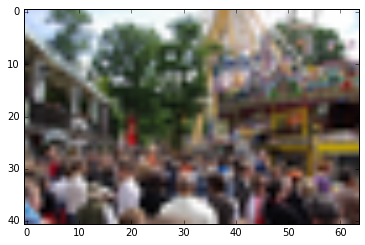

In [115]:
from PIL import Image
img1 = Image.open('BKW_Erlangen.png')
img1.thumbnail((64, 64), Image.ANTIALIAS) # resizes image in-place
imgplot1 = plt.imshow(img1)


Here we have the default interpolation, bilinear, since we did not give imshow() any interpolation argument.

Let’s try some others:

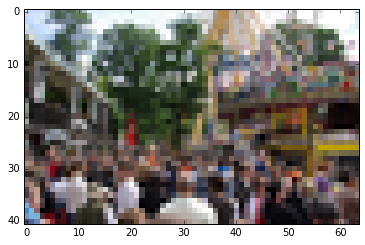

In [116]:
imgplot1 = plt.imshow(img1, interpolation="nearest")

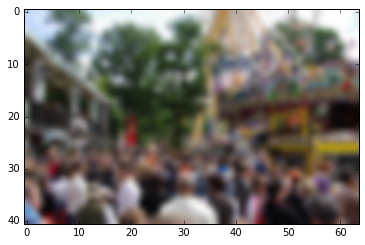

In [117]:
imgplot1 = plt.imshow(img1, interpolation="bicubic")

#### Exercise: place a small black watermark of img2 in img1 (right bottom corner)

### Contours and Surfaces

The **contour** command.

#### Contours of an Image

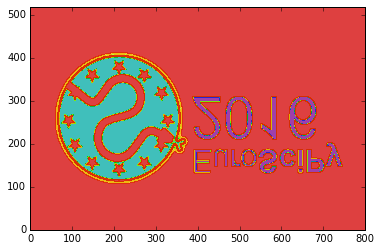

In [118]:
plt.contourf(lum_img2, 8, alpha=.75, cmap='spectral')


In [119]:
import numpy as np
c_img2 = np.flipud(lum_img2)

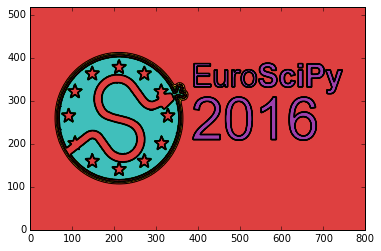

In [120]:
C = plt.contourf(c_img2, 8, alpha=.75, cmap='spectral')
C2 = plt.contour(c_img2, 8, colors='black', linewidth=.2)



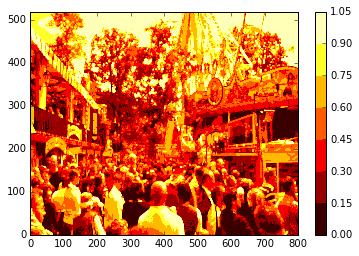

In [121]:
C = plt.contourf(np.flipud(lum_img1), 8, cmap='hot')
cbar = plt.colorbar()



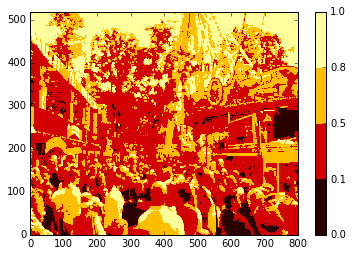

In [122]:
C = plt.contourf(np.flipud(lum_img1), levels = [0,0.1,0.5, 0.8,1], cmap='hot')
cbar = plt.colorbar()



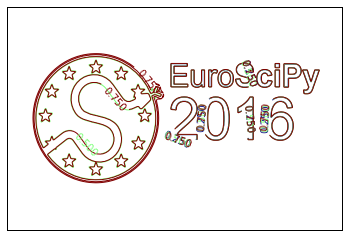

In [123]:
C = plt.contour(c_img2, 3, linewidth=.2)
plt.clabel(C, inline=1, fontsize=10)

plt.xticks(())
plt.yticks(())
plt.show()

#### Contour of Arrays

There are many ways (insert it in 3D first)

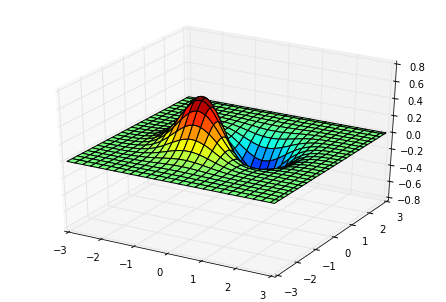

In [124]:
def f(x,y):
    return -(x+y)*np.exp(-x**2 -y**2)

from mpl_toolkits.mplot3d import Axes3D
import numpy as np

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(X, Y, f(X, Y), cmap='jet')


([], <a list of 0 Text yticklabel objects>)

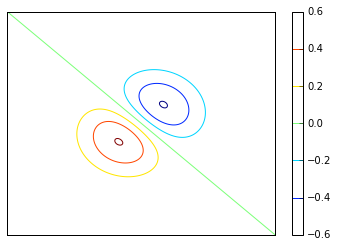

In [125]:
def f(x,y):
    return -(x+y)*np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)

plt.contour(X, Y, f(X, Y), 8, cmap='jet')
plt.colorbar()

plt.xticks(())
plt.yticks(())


([], <a list of 0 Text yticklabel objects>)

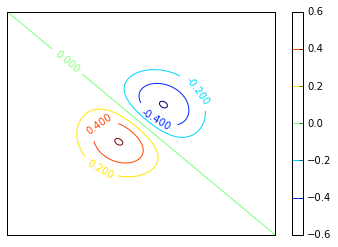

In [126]:
def f(x,y):
    return -(x+y)*np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)


C = plt.contour(X, Y, f(X, Y), 8, cmap='jet', linewidth=.5)
plt.colorbar()
plt.clabel(C, inline=1, fontsize=10)

plt.xticks(())
plt.yticks(())


([], <a list of 0 Text yticklabel objects>)

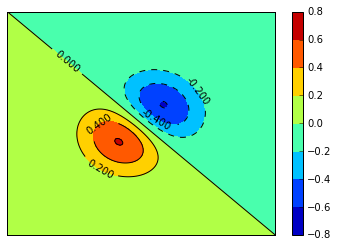

In [127]:
def f(x,y):
    return -(x+y)*np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)


C = plt.contourf(X, Y, f(X, Y), 8, cmap='jet')
cbar = plt.colorbar()
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)
clabel = plt.clabel(C, inline=1, fontsize=10)

plt.xticks(())
plt.yticks(())

([], <a list of 0 Text yticklabel objects>)

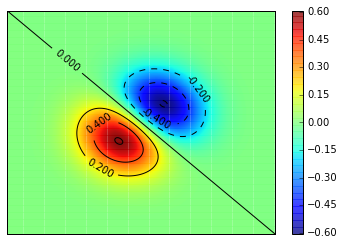

In [128]:
def f(x,y):
    return -(x+y)*np.exp(-x**2 -y**2)

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
X,Y = np.meshgrid(x, y)


C = plt.pcolor(X, Y, f(X, Y), alpha= 0.5, cmap='jet')
cbar = plt.colorbar()
C = plt.contour(X, Y, f(X, Y), 8, colors='black', linewidth=.5)
clabel = plt.clabel(C, inline=1, fontsize=10)

plt.xticks(())
plt.yticks(())

#### Exercise: make the level lines thicker and darker with increasing values

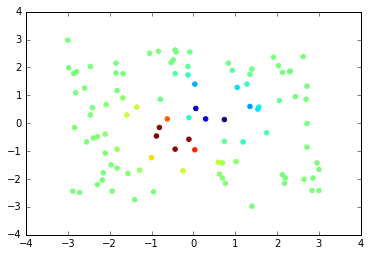

In [182]:
def f(x,y):
    return -(x+y)*np.exp(-x**2 -y**2)

import numpy as np

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
x_rand = np.random.randint(256, size = 100)
y_rand = np.random.randint(256, size = 100)

cols = []
for i in range(100):
    cols.append(f(x[x_rand[i]], y[y_rand[i]]))

plt.scatter(x[x_rand], y[y_rand], color = plt.cm.jet((cols+abs(min(cols)))/(max(cols)+abs(min(cols)))))

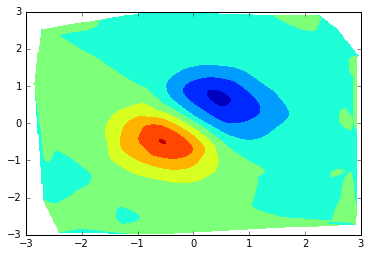

In [181]:
def f(x,y):
    return -(x+y)*np.exp(-x**2 -y**2)

import numpy as np

n = 256
x = np.linspace(-3, 3, n)
y = np.linspace(-3, 3, n)
x_rand = np.random.randint(256, size = 100)
y_rand = np.random.randint(256, size = 100)

from scipy.interpolate import griddata
def grid(x, y, z, n):
    xi = np.linspace(-3, 3, n)
    yi = np.linspace(-3, 3, n)
    
    Z = griddata((x, y), z, (xi[None, :], yi[:, None]), method='cubic')
    X, Y = np.meshgrid(xi, yi)
    return X, Y, Z

X, Y, Z = grid(x[x_rand], y[y_rand], f(x[x_rand], y[y_rand]), n)
C = plt.contourf(X, Y, Z, 8, cmap='jet')


### Learning by doing...

#### Symmetric faces: Face Symmetry

Make a symmetric selfie and safe it in the same folder as the Jupyter Notebook. Find the center of your face. Do a subplot containing one the right half of your face and a flipped right half on the left and a subplot containing the left half of your face and a flipped left half on the right. Do you look like a close relative? Which is your chocolate side? Have fun with exchanging your better halfs!

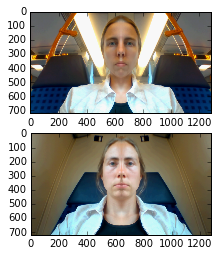

In [154]:
face = mpimg.imread('face.jpg')
face.shape
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(np.hstack([face[:,0:642,:],np.fliplr(face[:,0:642,:])]))
plt.subplot(2,1,2)
plt.imshow(np.hstack([np.fliplr(face[:,642::,:]),face[:,642::,:]]))


#### Gradients: Produce an image that fades on the left